In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, fsolve
from scipy.stats import rv_continuous

In [30]:
def TDerivative(E, E_0, s):
  return (0.89 * E_0 - 1.2)**s * (E_0 + E)**(-s) * (1+10**(-4) * s * E)**(-2) * (-s * (E_0 + E)**(-1) - 2*(10**(-4) * s)*(1+10**(-4) * s * E)**(-1))

# Same function but the expression is simplified
def TDerivativeSimple(E, E_0, s):
  a = E_0 + E
  b = 1 + 10**(-4) * s * E
  return s * (0.89 * E_0 - 1.2)**s * a**(-s) * b**(-2) * (-1/a - 2*(10**(-4))/b)

In [26]:
es = np.linspace(10, 10000, 100000)

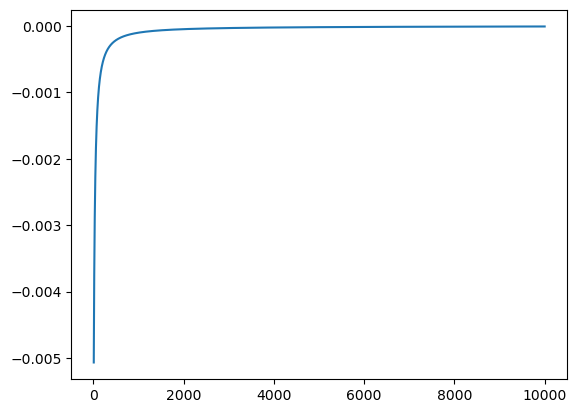

In [31]:
plt.plot(es, TDerivativeSimple(es, 26, 0.2))